In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [72]:
def max_mod(A):
    max_elem = 0
    i_max = 0
    j_max = 0
    for i in range(A.shape[0]):
        for j in range(i + 1, A.shape[0]):
            if abs(max_elem) < abs(A[i, j]):
                max_elem = A[i, j]
                i_max = i
                j_max = j
    return i_max, j_max

In [73]:
def max_gersh(A, iter, r, i, j):
    max_elem = 0
    max_i = 0
    max_j = 0
    if iter == 0:
        for i in range(A.shape[0]):
            for j in range(A.shape[0]):
                if i != j:
                    r[i] += abs(A[i, j]) ** 2
    else:
        for k in (i, j):
            r[k] = 0
            for j in range(A.shape[0]):
                if k != j:
                    r[k] += abs(A[k, j]) ** 2
    for i in range(A.shape[0]):
        if max_elem < r[i]:
            max_elem = r[i]
            max_i = i
    max_elem = 0
    for j in range(A.shape[0]):
        if max_elem < abs(A[max_i, j]) and max_i != j:
            max_elem = A[max_i, j]
            max_j = j
    return max_i, max_j

In [77]:
def jacobi_method(A, eps):
    iter = 0
    r = np.array(np.zeros(A.shape[0]))
    max_i = 0
    max_j = 0
    while True:
        H = np.eye(A.shape[0], dtype=float)
        #max_i, max_j = max_gersh(A, iter, r, max_i, max_j)  # обнуляемый элемент с помощью кругов Гершгорина
        max_i, max_j = max_mod(A)  # обнуляемый элемент - наибольший наддиагональный по модулю
        if abs(A[max_i, max_j]) < eps:
            return np.diag(A), iter
        iter += 1
        phi = 1 / 2 * (math.atan((2 * A[max_i, max_j]) / (A[max_i, max_i] - A[max_j, max_j])))
        H[max_i, max_i] = math.cos(phi)
        H[max_j, max_j] = math.cos(phi)
        H[max_i, max_j] = - math.sin(phi)
        H[max_j, max_i] = math.sin(phi)
        A = H.T @ A @ H

In [75]:
def circle_gersh(A, lambda_comp):
    n = A.shape[0]
    fig, ax = plt.subplots(1, 1)
    a = A
    #a = [[1.0 / (i - j + 0.5) for i in xrange(n)] for j in xrange(n)]
    a = np.array(a)
    #a = np.diag(np.arange(n))
    a = a + 2 * np.random.randn(n, n)
    #u = np.random.randn(n, n)
    #a = np.linalg.inv(u).dot(a).dot(u)
    xg = np.diag(a).real
    yg = np.diag(a).imag
    rg = np.zeros(n)
    ev = lambda_comp
    for i in range(n):
        rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
        crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
        ax.add_patch(crc)
    plt.scatter(ev.real, ev.imag, color='r', label="Eigenvalues")
    plt.axis('equal')
    plt.legend()
    ax.set_title('Eigenvalues and Gershgorin circles')
    fig.tight_layout()

Матрица Гильбертва 4 порядка
Погрешность: 0.01
Количество итераций: 7
||lambda_acc - lambda|| = 0.0037541528653879776

Матрица Гильбертва 4 порядка
Погрешность: 0.001
Количество итераций: 10
||lambda_acc - lambda|| = 0.00010713575810880757

Матрица Гильбертва 4 порядка
Погрешность: 0.0001
Количество итераций: 10
||lambda_acc - lambda|| = 0.00010713575810880757

Матрица Гильбертва 4 порядка
Погрешность: 1e-05
Количество итераций: 10
||lambda_acc - lambda|| = 0.00010713575810880757

Матрица Гильбертва 6 порядка
Погрешность: 0.01
Количество итераций: 11
||lambda_acc - lambda|| = 0.013009493166636316

Матрица Гильбертва 6 порядка
Погрешность: 0.001
Количество итераций: 11
||lambda_acc - lambda|| = 0.013009493166636316

Матрица Гильбертва 6 порядка
Погрешность: 0.0001
Количество итераций: 11
||lambda_acc - lambda|| = 0.013009493166636316

Матрица Гильбертва 6 порядка
Погрешность: 1e-05
Количество итераций: 11
||lambda_acc - lambda|| = 0.013009493166636316

Матрица Гильбертва 10 порядка
Погр

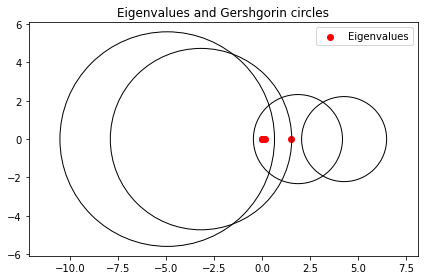

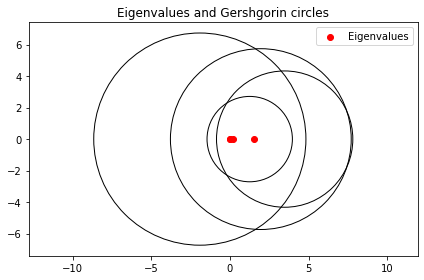

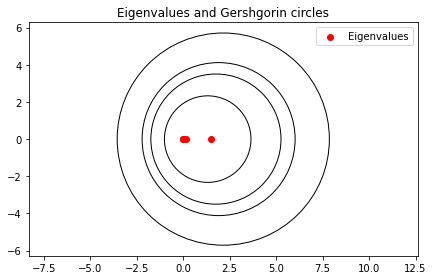

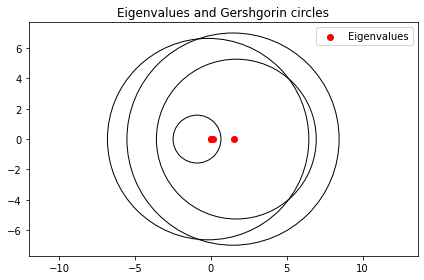

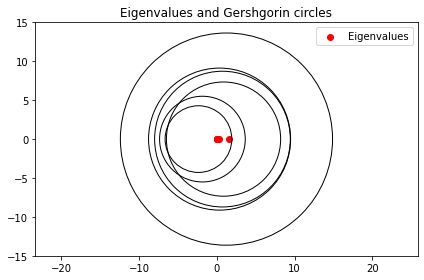

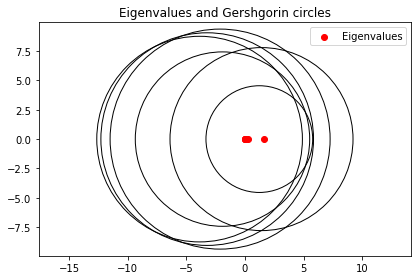

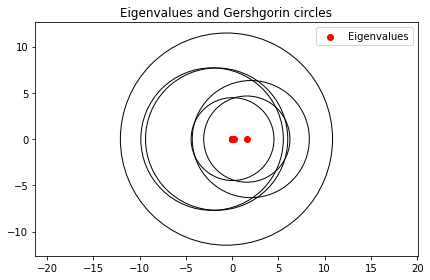

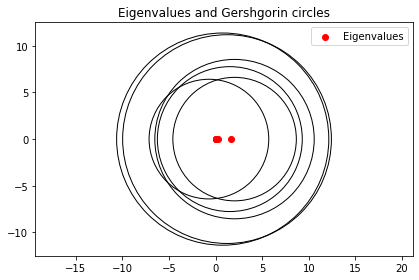

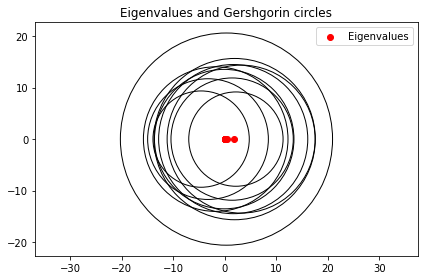

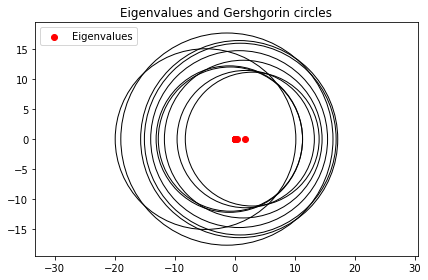

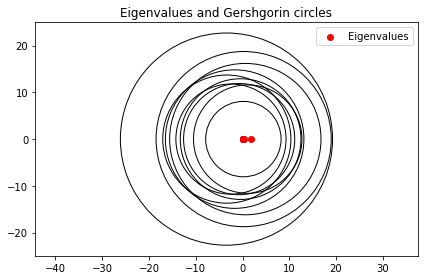

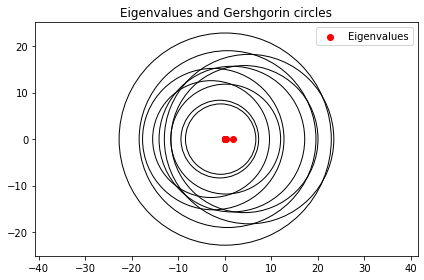

In [76]:
# обнуляемый элемент с помощью кругов Гершгорина
for n in [4, 6, 10]:
    A = np.array(np.zeros((n, n)), dtype=float)
    for i in range(n):
        for j in range(n):
            A[i][j] = 1 / (i + 1 + j + 1 - 1)
    lambda_acc = np.linalg.eig(A)[0]
    for eps in (1e-2, 1e-3, 1e-4, 1e-5):
        print("Матрица Гильбертва", n, "порядка")
        print("Погрешность:", eps)
        lambda_comp, iter = jacobi_method(A, eps)
        print("Количество итераций:", iter)
        print("||lambda_acc - lambda|| =", np.linalg.norm(np.sort(lambda_acc) - np.sort(lambda_comp)))
        circle_gersh(A, lambda_comp)
        print()
    

Матрица Гильбертва 4 порядка
Погрешность: 0.01
Количество итераций: 8
||lambda_acc - lambda|| = 0.003665365475166405

Матрица Гильбертва 4 порядка
Погрешность: 0.001
Количество итераций: 11
||lambda_acc - lambda|| = 7.597558912120772e-08

Матрица Гильбертва 4 порядка
Погрешность: 0.0001
Количество итераций: 11
||lambda_acc - lambda|| = 7.597558912120772e-08

Матрица Гильбертва 4 порядка
Погрешность: 1e-05
Количество итераций: 15
||lambda_acc - lambda|| = 3.023943389528246e-13

Матрица Гильбертва 6 порядка
Погрешность: 0.01
Количество итераций: 14
||lambda_acc - lambda|| = 0.012834524490969099

Матрица Гильбертва 6 порядка
Погрешность: 0.001
Количество итераций: 22
||lambda_acc - lambda|| = 0.0002952391919886115

Матрица Гильбертва 6 порядка
Погрешность: 0.0001
Количество итераций: 28
||lambda_acc - lambda|| = 7.473406443137264e-06

Матрица Гильбертва 6 порядка
Погрешность: 1e-05
Количество итераций: 33
||lambda_acc - lambda|| = 7.6007543838107515e-06

Матрица Гильбертва 10 порядка
Погр

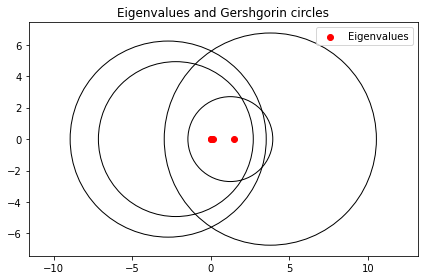

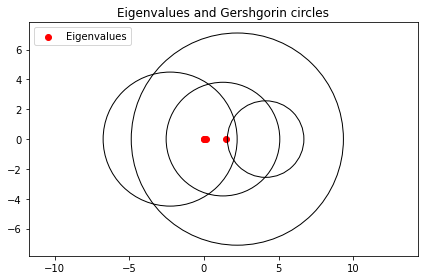

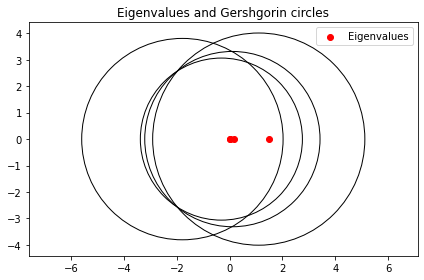

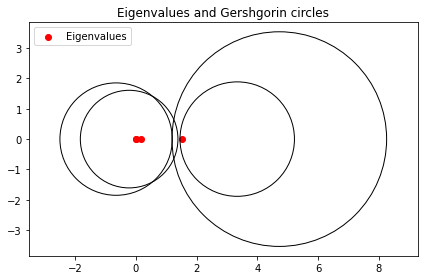

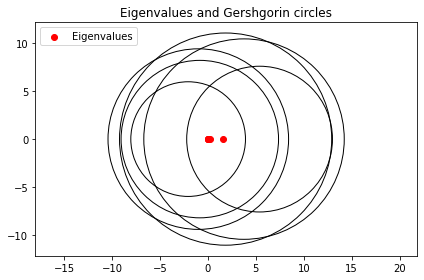

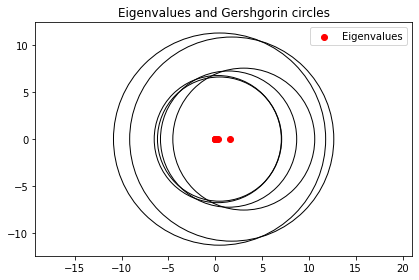

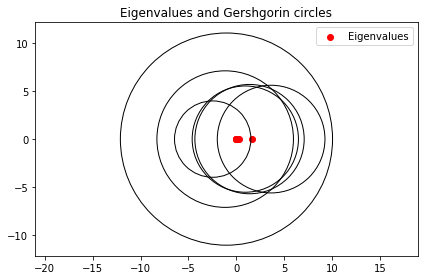

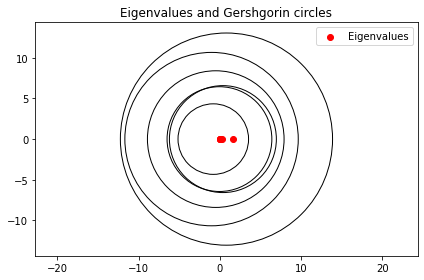

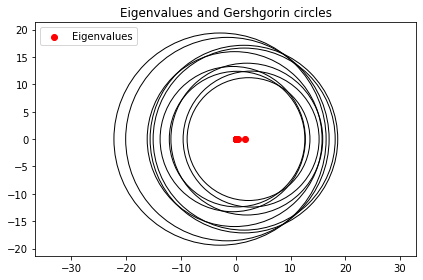

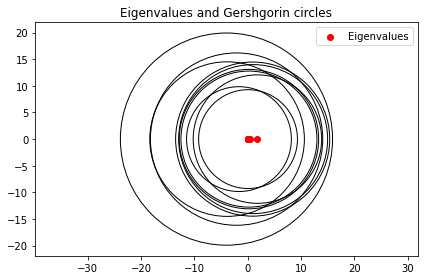

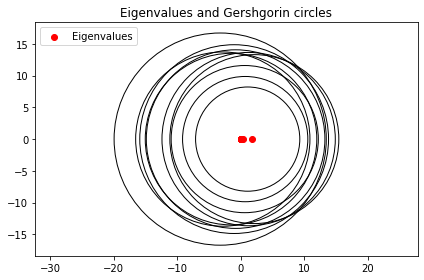

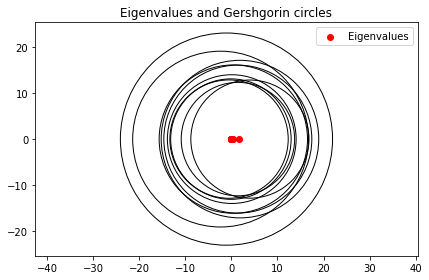

In [78]:
# обнуляемый элемент - наибольший наддиагональный по модулю 
for n in [4, 6, 10]:
    A = np.array(np.zeros((n, n)), dtype=float)
    for i in range(n):
        for j in range(n):
            A[i][j] = 1 / (i + 1 + j + 1 - 1)
    lambda_acc = np.linalg.eig(A)[0]
    for eps in (1e-2, 1e-3, 1e-4, 1e-5):
        print("Матрица Гильбертва", n, "порядка")
        print("Погрешность:", eps)
        lambda_comp, iter = jacobi_method(A, eps)
        print("Количество итераций:", iter)
        print("||lambda_acc - lambda|| =", np.linalg.norm(np.sort(lambda_acc) - np.sort(lambda_comp)))
        circle_gersh(A, lambda_comp)
        print()

In [64]:
data_1 = np.array([[-5.509882, 1.870086, 0.422908],
             [0.287865, -11.811654, 5.7119],
             [0.049099, 4.308033, -12.970687]])
data_2 = np.array([[-1.00449, -0.38726, 0.59047],
             [0.38726, 0.73999, 0.12519],
             [0.59047, 0.12519, -1.08660]])

Матрица:
[-5.509882  1.870086  0.422908]
[  0.287865 -11.811654   5.7119  ]
[  0.049099   4.308033 -12.970687]
Погрешность: 0.01
Количество итераций: 7
||lambda_acc - lambda|| = 0.0007574484420255883

Матрица:
[-5.509882  1.870086  0.422908]
[  0.287865 -11.811654   5.7119  ]
[  0.049099   4.308033 -12.970687]
Погрешность: 0.001
Количество итераций: 8
||lambda_acc - lambda|| = 0.0007828313248042651

Матрица:
[-5.509882  1.870086  0.422908]
[  0.287865 -11.811654   5.7119  ]
[  0.049099   4.308033 -12.970687]
Погрешность: 0.0001
Количество итераций: 10
||lambda_acc - lambda|| = 1.7978009409355734e-07

Матрица:
[-5.509882  1.870086  0.422908]
[  0.287865 -11.811654   5.7119  ]
[  0.049099   4.308033 -12.970687]
Погрешность: 1e-05
Количество итераций: 10
||lambda_acc - lambda|| = 1.7978009409355734e-07



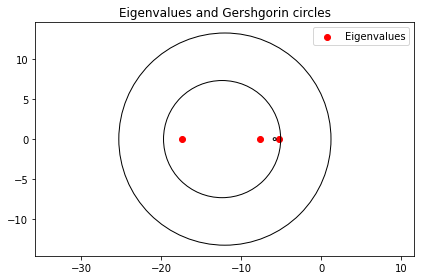

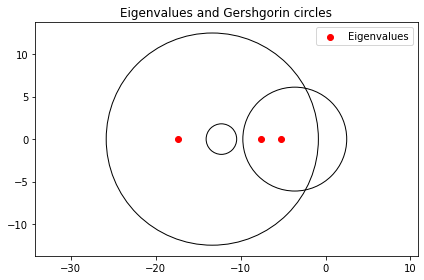

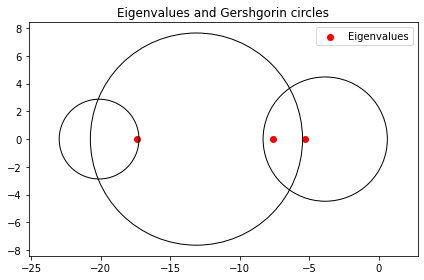

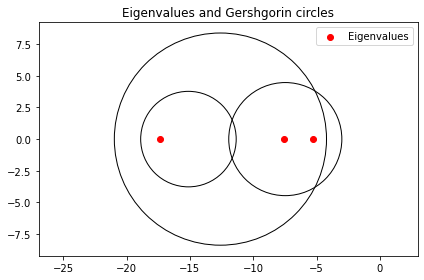

In [66]:
lambda_acc = np.linalg.eig(data_1)[0]
for eps in (1e-2, 1e-3, 1e-4, 1e-5):
    print("Матрица:")
    print(*data_1, sep='\n')
    print("Погрешность:", eps)
    lambda_comp, iter = jacobi_method(data_1, eps)
    print("Количество итераций:", iter)
    print("||lambda_acc - lambda|| =", np.linalg.norm(np.sort(lambda_acc) - np.sort(lambda_comp)))
    circle_gersh(data_1, lambda_comp)
    print()

Матрица:
[-1.00449 -0.38726  0.59047]
[0.38726 0.73999 0.12519]
[ 0.59047  0.12519 -1.0866 ]
Погрешность: 0.01
Количество итераций: 6
||lambda_acc - lambda|| = 0.00021207200096251338

Матрица:
[-1.00449 -0.38726  0.59047]
[0.38726 0.73999 0.12519]
[ 0.59047  0.12519 -1.0866 ]
Погрешность: 0.001
Количество итераций: 6
||lambda_acc - lambda|| = 0.00021207200096251338

Матрица:
[-1.00449 -0.38726  0.59047]
[0.38726 0.73999 0.12519]
[ 0.59047  0.12519 -1.0866 ]
Погрешность: 0.0001
Количество итераций: 8
||lambda_acc - lambda|| = 4.599122236969095e-05

Матрица:
[-1.00449 -0.38726  0.59047]
[0.38726 0.73999 0.12519]
[ 0.59047  0.12519 -1.0866 ]
Погрешность: 1e-05
Количество итераций: 10
||lambda_acc - lambda|| = 2.0276810456133596e-09



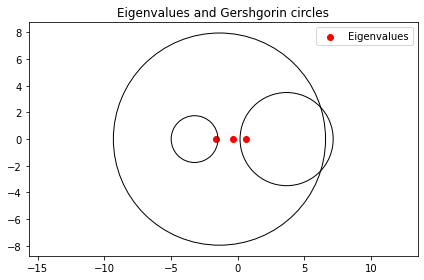

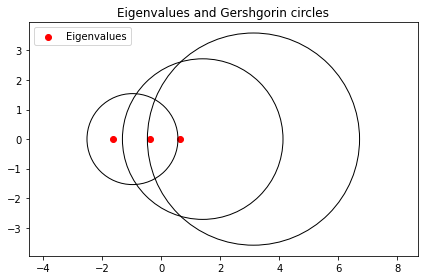

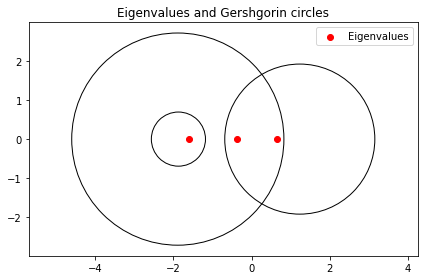

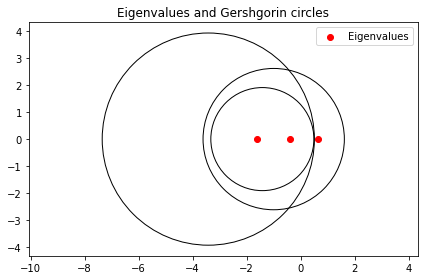

In [70]:
lambda_acc = np.linalg.eig(data_2)[0]
for eps in (1e-2, 1e-3, 1e-4, 1e-5):
    print("Матрица:")
    print(*data_2, sep='\n')
    print("Погрешность:", eps)
    lambda_comp, iter = jacobi_method(data_2, eps)
    print("Количество итераций:", iter)
    print("||lambda_acc - lambda|| =", np.linalg.norm(np.sort(lambda_acc) - np.sort(lambda_comp)))
    circle_gersh(data_2, lambda_comp)
    print()